In [68]:
# Hull-White One-Factor Model vgl. engl. Wikipedia
# dX[t] = (theta[t] + a * X[t])*dt + sigma dW[t])
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


def simulate_Hull_White_One_Factor(r0: float , a: float, sigma: float, T,N, f) ->pd.DataFrame:
    def const_forwards(value: float, N: int) -> np.array:
      
      return np.full(N, value)

    def timepoints(T: int, N: int) -> np.array:
      """
      Diskretisierung
      """
      return np.linspace(0, T, N)
#Initialisierung der Variablen
    t = timepoints(T, N)
    f_1 = const_forwards(f, N)
    e = np.zeros(N)
    v = np.zeros(N)
    r = np.ones(N) * r0
    theta = f_1 + sigma**2/(2*a**2)*(1-np.exp(-a*t))**2 
    for el in range(1, N):
      deltat = t[el] - t[el-1] #Zeitdifferenz
      e[el] = r[el-1] * np.exp(-a*deltat) + theta[el] - theta[el-1] * np.exp(-a*deltat) #Erwartungswert der Normalverteilung
      v[el] = sigma**2/(2*a) * (1 - np.exp(-2*a*deltat)) #Varianz der Normalverteilung
      r[el] = np.random.normal(e[el], np.sqrt(v[el])) #Zufallsvariable r_t \sim N(e_t, v_t) nach Wikipedia

    
    dict = {'Time' : t, 'Interest Rate' : r}
    interest_rate_simulation = pd.DataFrame.from_dict(data = dict)
    interest_rate_simulation.set_index('Time', inplace = True)
    return interest_rate_simulation
     

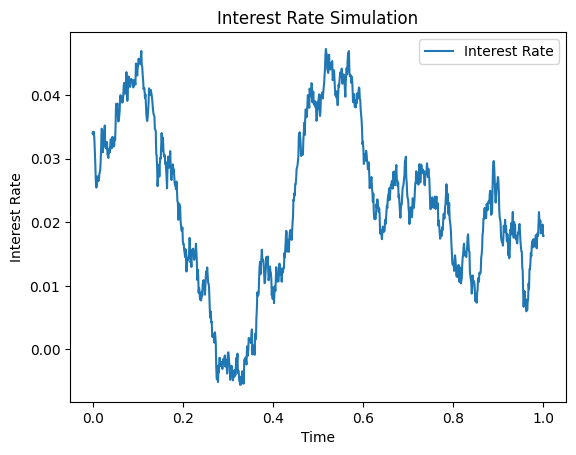

/tmp/ipykernel_79693/3650266280.py:25: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  int = simps(rt['Interest Rate'], rt.index)
/tmp/ipykernel_79693/3650266280.py:44: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(y_values, x_values)


bank account: 1.0228949603589648


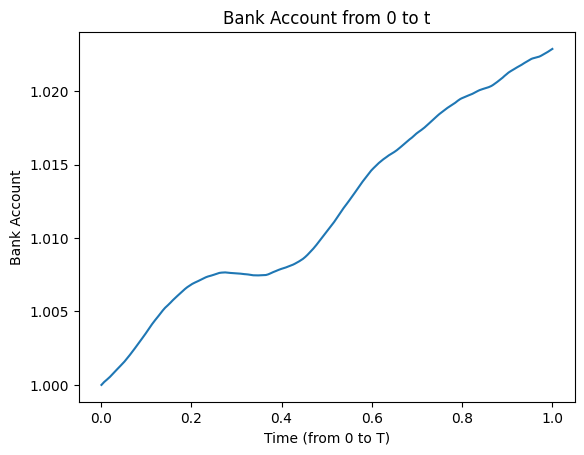

In [69]:

#fixing the Parameters
#theta= f_1 + sigma**2/(2*a**2)*(1-np.exp(-a*t))**2
T=1
f_1=0.10
sigma = 0.2 
alpha = 0.05 #=a in der Notation von Wikipedia
X0 = 0.02
l = 0.03
lamda= 0.2
N=1000

rt = l + lamda * simulate_Hull_White_One_Factor(X0, alpha, sigma, T, N, f_1)

# Plot the interest rate simulation
rt.plot()
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Simulation')
plt.show()


from scipy.integrate import simps

# Compute the integral of the interest rates
int = simps(rt['Interest Rate'], rt.index)

# Compute bank account
result = np.exp(int)
print(f"bank account: {result}")


bank_account = []
spot_rates = []
forward_rates = []
time_points = np.linspace(0, T, N)  # Generate time points from 0 to T_new

for t_idx in range(1, len(time_points)):
    # Slice up to the current time index
    cut_out_new = rt.iloc[:t_idx]
    y_values = cut_out_new['Interest Rate']
    x_values = time_points[:t_idx]  # Ensure x-values match the sliced data
    
    # Compute the integral of interest rates
    integral = simps(y_values, x_values)
    
    # Compute bond price as exp(-integral)
    bank = np.exp(integral)
    spots = integral / time_points[t_idx]
    forwards = 1/time_points[t_idx]*(np.log((1/bank)))


    spot_rates.append(spots)
    bank_account.append(bank)
    forward_rates.append(forwards)

# Plot the bond prices over time
plt.plot(time_points[1:], bank_account)
plt.xlabel('Time (from 0 to T)')
plt.ylabel('Bank Account')
plt.title('Bank Account from 0 to t')
plt.show()





/tmp/ipykernel_79693/3523872708.py:14: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_new = simps(out_new['Interest Rate'], out_new.index)


Bank_Account:1.4318464159935973


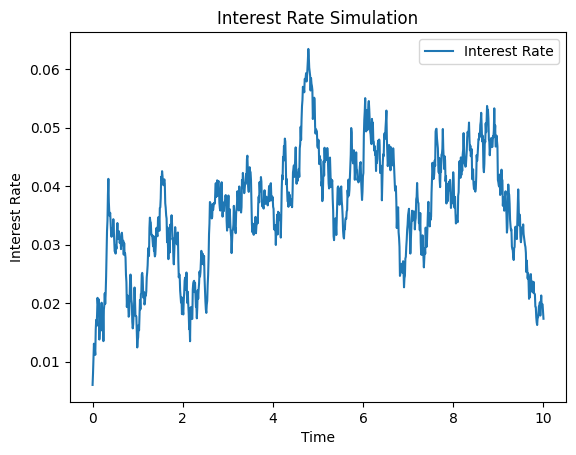

/tmp/ipykernel_79693/3523872708.py:42: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(y_values, x_values)


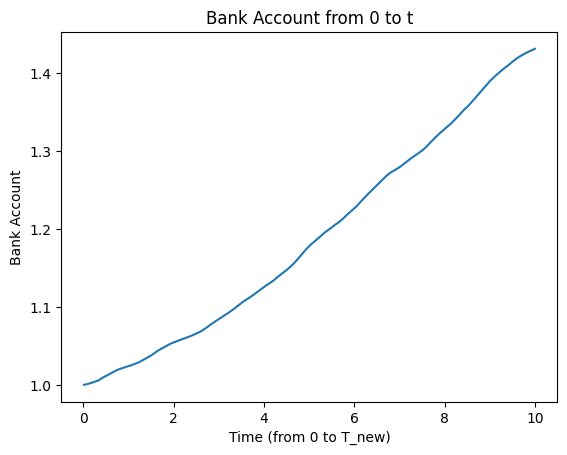

In [70]:
from scipy.integrate import simps

T_new=10
f_new=0.10
sigma_new = 0.1
beta_new = 0.05
X0_new = 0.03
l_new = 0
lbd_new = 0.2
N_new=1000

out_new = l_new + lbd_new * simulate_Hull_White_One_Factor(X0_new, beta_new, sigma_new, T_new, N_new, f_new)
# Compute the integral of the interest rates
integral_new = simps(out_new['Interest Rate'], out_new.index)

# Compute e^(-integral)
result_new = np.exp(integral_new)
print(f"Bank_Account:{result_new}")


# Plot the interest rate simulation
out_new.plot()
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Simulation')
plt.show()


bank_account = []
spot_rates = []
forward_rates = []
time_points = np.linspace(0, T_new, N_new)  # Generate time points from 0 to T_new

for t_idx in range(1, len(time_points)):
    # Slice up to the current time index
    cut_out_new = out_new.iloc[:t_idx]
    
    y_values = cut_out_new['Interest Rate']
    x_values = time_points[:t_idx]  # Ensure x-values match the sliced data
    
    # Compute the integral of interest rates
    integral = simps(y_values, x_values)
    
    # Compute bond price as exp(-integral)
    banks = np.exp(integral)
    
    bank_account.append(banks)
    spots = integral / time_points[t_idx]
    forwards = 1/time_points[t_idx]*(np.log(1/banks))

    spot_rates.append(spots)
    
    forward_rates.append(forwards)


# Plot the bond prices over time
plt.plot(time_points[1:], bank_account)
plt.xlabel('Time (from 0 to T_new)')
plt.ylabel('Bank Account')
plt.title('Bank Account from 0 to t')
plt.show()



Bond Price: 0.9806808239564151
[0.9822965237654591, 0.9817455139437171, 0.9812125802330629, 0.9806983050978645, 0.9802032696667302, 0.9797280538628375, 0.9792732365377129, 0.9788393956084765, 0.9784271081985637, 0.9780369507818395, 0.977669499330267, 0.977325329464909, 0.9770050166104555, 0.9767091361532269, 0.9764382636025318, 0.9761929747556973, 0.9759738458663693, 0.975781453816553, 0.9756163762920438, 0.9754791919614444, 0.9753704806588901, 0.975290823570216, 0.9752408034229829, 0.9752210046800536, 0.9752320137369946, 0.975274419123305, 0.9753488117073795, 0.975455784905477, 0.9755959348946232, 0.9757698608295253, 0.9759781650635596, 0.9762214533740085, 0.9765003351913971, 0.9768154238332947, 0.9771673367424372, 0.9775566957293375, 0.9779841272195434, 0.978450262505534, 0.9789557380034258, 0.979501195514568, 0.9800872824921544, 0.9807146523129922, 0.9813839645544974, 0.9820958852770811, 0.9828510873120804, 0.9836502505553398, 0.9844940622666122, 0.9853832173749055, 0.98631841879001

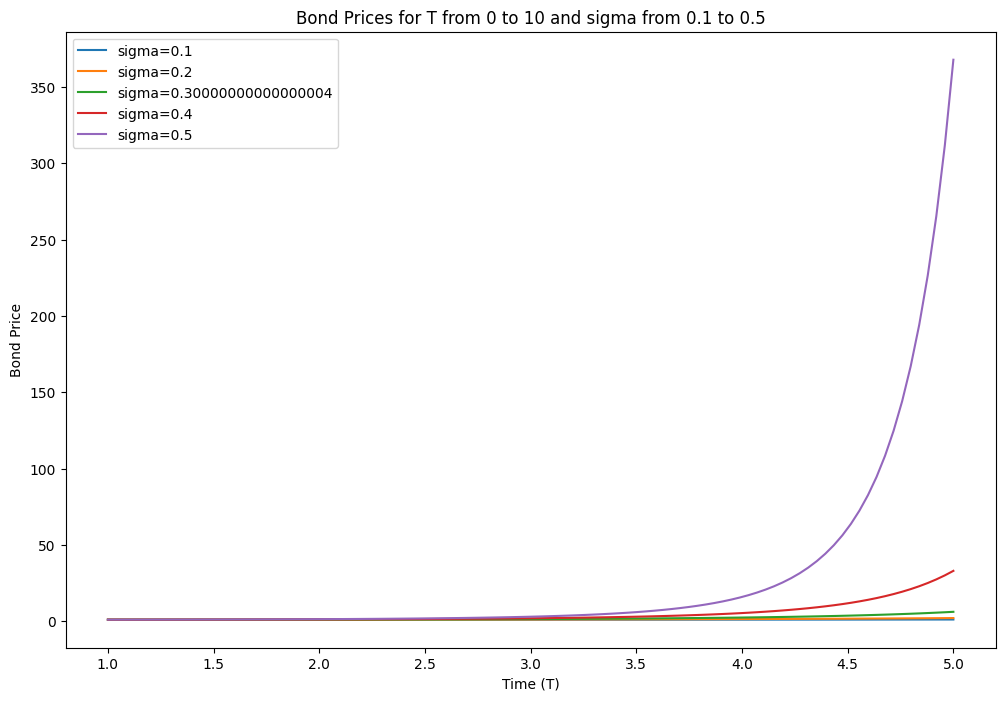

In [73]:
from scipy import integrate

T=1
f_1=0.10
sigma = 0
beta = -0.05
X_0 = 0.02
l = 0
lamda= 1
N=1000

def bond_price(T, l, beta, sigma, X_0, f_1):
    def PHI_y(t, sigma, beta):
        return (sigma**2 / (4 * beta**3)) * (2 * beta * t - 4 * np.exp(beta * t) + 3 + np.exp(2 * beta * t))

    def PSI_y(t, beta):
        return (1 / beta) * (1 - np.exp(beta * t))

    def theta(sigma, beta, t, f_1):
        return f_1 + sigma**2 / (2 * beta**2) * (1 - np.exp(beta * t))**2

    def integrand(s, T, sigma, beta, f_1):
        return theta(sigma, beta, s, f_1) * PHI_y(T - s, sigma, beta)
    
    integral = integrate.quad(lambda s: integrand(s, T, sigma, beta, f_1), 0, T)
    a = -l * T
    b = PHI_y(T, sigma, beta)
    c = PSI_y(T, beta) * X_0
    bond1 = np.exp(a + b + c + integral[0])
    return bond1

bond1 = bond_price(T, l, beta, sigma, X_0, f_1)
print(f"Bond Price: {bond1}")

# Plot the bond prices for T from 0 to 10 and sigma from 0.1 to 0.5
T_values = np.linspace(1, 5, 100)
sigma_values = np.linspace(0.1, 0.5, 5)

plt.figure(figsize=(12, 8))

for sigma in sigma_values:
    bond_prices = [bond_price(T, l, beta, sigma, X_0, f_1) for T in T_values]
    print(bond_prices)
    plt.plot(T_values, bond_prices, label=f'sigma={sigma}')

plt.xlabel('Time (T)')
plt.ylabel('Bond Price')
plt.title('Bond Prices for T from 0 to 10 and sigma from 0.1 to 0.5')
plt.legend()
plt.show()

forward rate:0.058260548606606656


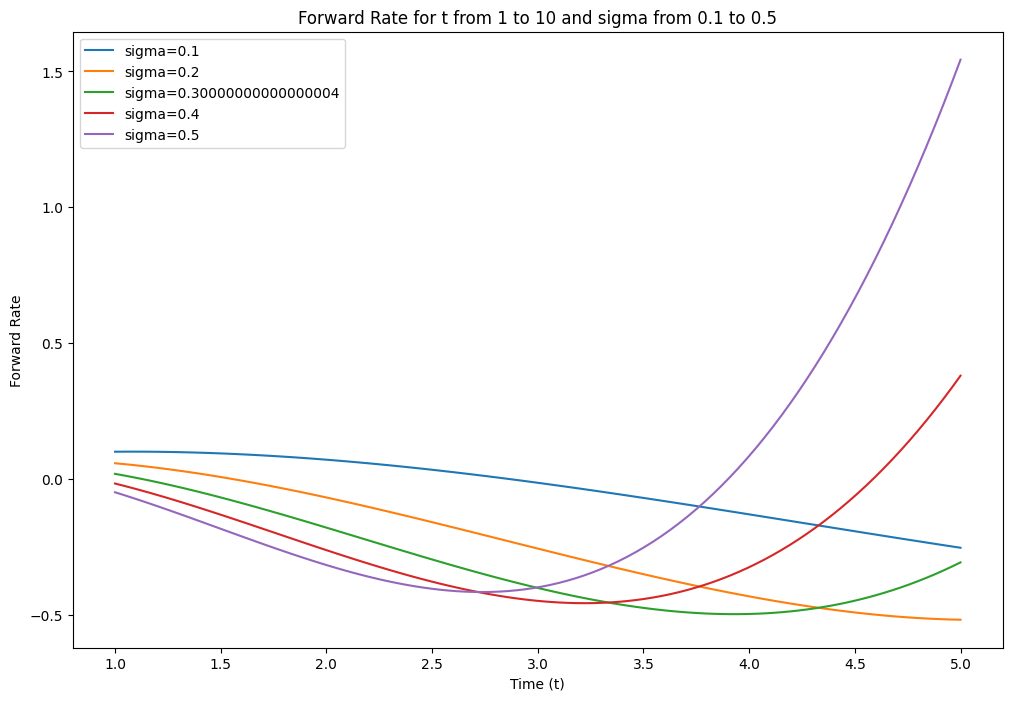

In [72]:


T=1
f_1=0.10
sigma = 0.2 
beta = -0.05
X_0 = 0.02
l = 0.03
lamda= 0.2
N=1000

def forward_rate(T, l, beta , sigma, X_0,f_1):
    def phi_y_derivative(t: float, sigma: float, beta: float) -> float:
        """
        Compute the derivative of Phi_y(t).
        """
        term1 = 2 
        term2 = -4 * np.exp(beta * t)
        term3 = 2 * np.exp(2 * beta * t)
        return (sigma / (4 * beta**2)) * (term1 + term2 + term3)

    def psi_y_derivative(t: float, beta: float) -> float:
        """
        Compute the derivative of Psi_y(t).
        """
        return -np.exp(beta * t)

    def theta(sigma, beta, t, f_1):
        return f_1 + sigma**2 / (2 * beta**2) * (1 - np.exp(-beta * t))**2
    
    def integrand(T,s,beta, sigma,f_1):
        return theta(sigma, beta, s, f_1) * psi_y_derivative(T - s, beta)

    integral_result = integrate.quad(lambda s: integrand(T, s, beta, sigma,f_1), 0, T)
   
    result = (l - integral_result[0] - phi_y_derivative(T, sigma, beta) - psi_y_derivative(T, beta)* X_0)
    return result
result = forward_rate(T, l, beta, sigma, X_0, f_1)
print(f"forward rate:{result}")

# Plot the forward rate for t from 1 to 10 and sigma from 0.1 to 0.5
t_values = np.linspace(1, 5, 100)
sigma_values = np.linspace(0.1, 0.5, 5)

plt.figure(figsize=(12, 8))

for sigma in sigma_values:
    forward_rates = [forward_rate(t, l, beta, sigma, X_0, f_1) for t in t_values]
    plt.plot(t_values, forward_rates, label=f'sigma={sigma}')

plt.xlabel('Time (t)')
plt.ylabel('Forward Rate')
plt.title('Forward Rate for t from 1 to 10 and sigma from 0.1 to 0.5')
plt.legend()
plt.show()